## 5주차: 코드를 재사용하는 마법 (함수와 딕셔너리 활용)

**강의 개요:**

지난 4주차에는 `for` 반복문을 사용하여 리스트의 모든 요소를 처리하거나 특정 작업을 여러 번 반복하는 방법을 배웠습니다. 이를 통해 우리는 데이터를 순회하며 합계나 평균을 계산하고, 조건에 맞는 데이터를 필터링하는 등 훨씬 효율적인 코드 작성이 가능해졌죠. 반복문 덕분에 코드의 길이가 획기적으로 줄어드는 것을 경험했을 겁니다.

하지만 코드를 작성하다 보면, 반복문만으로는 해결되지 않는 또 다른 문제에 직면하게 됩니다. 바로 **코드의 중복**입니다. 예를 들어, 특정 계산 로직( скажем, 1인당 GDP 계산, 이익률 계산)이 프로그램의 여러 부분에서 필요할 수 있습니다. 이때마다 해당 코드를 복사해서 붙여넣는다면, 코드가 길어지고 수정이 필요할 때 모든 복사본을 찾아 고쳐야 하는 불편함이 발생합니다.

이번 주에는 이러한 코드의 중복을 방지하고, 코드를 **재사용 가능한 부품(모듈)** 으로 만드는 강력한 방법인 **함수(Function)** 에 대해 배웁니다. 함수를 사용하면 특정 작업을 수행하는 코드 블록에 이름을 붙여두고, 필요할 때마다 그 이름만 불러서 사용할 수 있습니다. 이를 통해 코드는 훨씬 **간결하고, 체계적이며, 유지보수가 쉬워집니다.** (이것을 프로그래밍에서는 **DRY 원칙: Don't Repeat Yourself** 라고 부르기도 합니다).

또한, 지난주에 잠시 맛보았던 **딕셔너리(Dictionary)** 에 대해 좀 더 깊이 알아보고, 함수와 함께 어떻게 효과적으로 활용될 수 있는지 경제/회계 예제를 통해 살펴볼 것입니다.

**이번 시간 학습 목표:**

1.  함수가 왜 필요한지(코드 재사용, 구조화) 이해하고, DRY 원칙의 의미를 설명할 수 있습니다.
2.  `def` 키워드를 사용하여 함수를 정의하고, 매개변수(parameter)와 반환값(`return`)의 개념을 이해합니다.
3.  함수를 올바르게 호출하고, 인자(argument)를 전달하는 방법을 익힙니다.
4.  기본적인 경제 계산(이익, 수요량, 총비용, 1인당 GDP 등)을 수행하는 함수를 직접 정의하고 사용할 수 있습니다.
5.  딕셔너리를 함수 인자로 전달하거나 함수 내에서 생성/활용하는 방법을 이해하고, 딕셔너리 순회(`items()` 등) 방법을 익힙니다.
6.  **(맛보기)** 함수를 이용해 생성된 데이터(예: 수요 곡선 데이터)를 시각화하는 과정을 이해합니다.
7.  (선택) 순서가 있고 변경 불가능한 자료구조인 튜플(Tuple)의 기본 개념을 이해합니다.

---

## 1. 함수란 무엇이고 왜 사용할까요? : 코드 재사용과 구조화

**함수(Function)** 는 특정 작업을 수행하는 **독립적인 코드 블록에 이름을 붙인 것**입니다. 마치 우리가 자주 사용하는 도구나 레시피에 이름을 붙여놓고 필요할 때마다 꺼내 쓰는 것과 비슷합니다.

**왜 함수를 사용할까요?**

* **재사용성 (Reusability):** 한번 잘 만들어 둔 함수는 프로그램의 여러 곳에서 필요할 때마다 **이름만 불러서(호출하여)** 쉽게 재사용할 수 있습니다. 똑같은 코드를 여러 번 작성할 필요가 없어지죠.
    * *경제학 예시:* 여러 국가의 1인당 GDP를 계산해야 할 때, 1인당 GDP를 계산하는 함수 `calculate_gdp_per_capita()` 를 한 번만 만들어 두면, 각 국가의 GDP와 인구 데이터만 바꿔 넣으면서 함수를 호출하여 쉽게 계산할 수 있습니다.
* **코드 구조화 및 가독성 향상:** 복잡한 작업을 여러 개의 작은 함수로 나누어 구현하면, 전체 코드의 구조가 명확해지고 이해하기 쉬워집니다. 각 함수는 특정 기능만 담당하므로, 코드를 읽거나 수정할 때 해당 함수만 집중해서 보면 됩니다.
    * *회계 예시:* 재무제표 분석 프로그램을 만들 때, '매출 총이익 계산 함수', '영업 이익 계산 함수', '부채 비율 계산 함수' 등으로 기능을 나누어 구현하면 전체 로직을 파악하기 쉽습니다.
* **유지보수 용이성:** 특정 기능에 수정이 필요할 때, 해당 기능을 담당하는 함수 내부만 고치면 됩니다. 함수를 사용하지 않고 코드를 복사-붙여넣기 했다면, 관련된 모든 부분을 찾아서 수정해야 하는 번거로움이 있습니다.

---

## 2. 함수 만들기 (정의) 와 사용하기 (호출)

**함수 정의 (Defining a Function):**

파이썬에서 함수를 만들 때는 `def` 키워드를 사용합니다.

```
def 함수이름(매개변수1, 매개변수2, ...):
    """
    이 함수는 무엇을 하는 함수인지 설명하는 공간입니다. (Docstring)
    여러 줄로 작성할 수도 있습니다.
    """
    # 함수가 수행할 코드 블록 (★반드시 들여쓰기★)
    # ... 코드 ...
    # [선택 사항] 결과를 반환할 때는 return 키워드 사용
    # return 결과값

```

* **`def`**: "함수를 정의(define)한다"는 키워드입니다.
* **`함수이름`**: 함수를 식별하는 이름입니다. 변수 이름 규칙과 동일하게 짓습니다 (보통 소문자 스네이크 케이스). 함수가 하는 일을 잘 나타내는 동사 형태의 이름(예: `calculate_average`, `print_report`)을 많이 사용합니다.
* **`매개변수(Parameter)`**: 함수가 작업을 수행하는 데 필요한 **입력값**을 받는 변수입니다. 괄호 `()` 안에 쉼표로 구분하여 적습니다. 매개변수가 필요 없으면 `()`만 씁니다. 함수 내부에서 일반 변수처럼 사용됩니다.
* **콜론(`:`)**: 함수 정의부 끝에는 반드시 콜론을 붙입니다.
* **`Docstring (문서 문자열)`**: 함수 정의 바로 아래 따옴표 세 개(`"""Docstring"""` 또는 `'''Docstring'''`)로 감싸서 함수에 대한 설명을 적는 부분입니다. 필수는 아니지만, 함수가 어떤 기능을 하고, 어떤 매개변수를 받으며, 무엇을 반환하는지 등을 적어두면 매우 유용합니다 (협업 및 코드 유지보수에 중요!).
* **함수 본문(Body)**: 함수가 실제로 수행할 코드를 작성하는 부분입니다. 반드시 들여쓰기 해야 합니다.
* **`return 결과값`**: 함수가 작업을 마친 후, 호출한 곳으로 **결과를 돌려줄 때** 사용합니다. `return` 문이 실행되면 함수는 즉시 종료되고 `결과값`이 반환됩니다. `return` 문이 없거나 `return` 만 쓰면 함수는 `None` 이라는 특별한 값을 반환합니다.

**함수 호출 (Calling a Function):**

함수를 정의했다고 해서 바로 실행되는 것은 아닙니다. 함수를 사용하려면 그 **이름을 불러주어야(호출해야)** 합니다.

`함수이름(인자1, 인자2, ...)`

* **`함수이름()`**: 사용할 함수의 이름을 적고 괄호 `()`를 붙입니다.
* **`인자(Argument)`**: 함수를 호출할 때 **실제로 전달하는 값**입니다. 함수 정의 시 작성한 매개변수(parameter)의 순서와 개수에 맞게 전달해야 합니다.

**매개변수(Parameter) vs 인자(Argument):**

* **매개변수:** 함수를 정의할 때 괄호 안에 적는 **입력 변수 이름** (함수 내부에서 사용).
* **인자:** 함수를 호출할 때 괄호 안에 **실제로 전달하는 값**.

---

## 3. 간단한 함수 예제 (경제/회계 맥락)

**예제 1: 두 수의 합계를 계산하여 반환하는 함수**

In [1]:
def calculate_sum(a, b):
  """두 개의 숫자를 입력받아 그 합계를 반환합니다."""
  result = a + b
  return result # 계산 결과를 반환

# 함수 호출 및 결과 사용
num1 = 150
num2 = 350
total_sum = calculate_sum(num1, num2) # a에 num1(150), b에 num2(350) 전달

print(f"{num1}와 {num2}의 합계는 {total_sum} 입니다.")

# 다른 값으로 함수 재사용
revenue_q1 = 1200
revenue_q2 = 1500
half_year_revenue = calculate_sum(revenue_q1, revenue_q2)
print(f"상반기 매출 합계: {half_year_revenue}")

150와 350의 합계는 500 입니다.
상반기 매출 합계: 2700


**예제 2: 간단한 이자 계산 함수 (결과를 print, 반환값 없음)**

In [2]:
def print_interest(principal, rate):
  """원금과 이자율을 받아 이자를 계산하고 출력합니다. (반환값 없음)"""
  interest = principal * rate
  print(f"원금 {principal}원에 대한 이자율 {rate*100}%의 이자는 {interest:.0f}원 입니다.")
  # return 문이 없으므로 None을 반환

# 함수 호출
principal_amount = 1000000 # 100만원
interest_rate = 0.04 # 4%

result_value = print_interest(principal_amount, interest_rate)
print("함수 반환값:", result_value) # None 출력됨

원금 1000000원에 대한 이자율 4.0%의 이자는 40000원 입니다.
함수 반환값: None


**예제 3: 기본 매개변수 값을 가지는 함수 (환율 변환)**

함수를 정의할 때 매개변수에 기본값을 설정해 둘 수 있습니다. 함수 호출 시 해당 인자가 생략되면 기본값이 사용됩니다.

In [3]:
def convert_usd_to_krw(usd_amount, exchange_rate=1350.0):
  """USD 금액을 KRW로 변환합니다. 환율 미지정시 기본값 1350.0 사용."""
  krw_amount = usd_amount * exchange_rate
  return krw_amount

# 기본 환율(1350.0) 사용
krw1 = convert_usd_to_krw(100) # usd_amount에 100 전달, exchange_rate는 기본값 사용
print(f"100 USD는 {krw1:.0f} KRW 입니다. (기본 환율 적용)")

# 특정 환율 지정
krw2 = convert_usd_to_krw(100, 1400.5) # exchange_rate에 1400.5 전달
print(f"100 USD는 {krw2:.0f} KRW 입니다. (환율 1400.5 적용)")

100 USD는 135000 KRW 입니다. (기본 환율 적용)
100 USD는 140050 KRW 입니다. (환율 1400.5 적용)


---

## 4. 함수로 경제 개념 표현하기

이제 함수를 사용하여 좀 더 구체적인 경제 개념을 코드로 구현해 봅시다.

**예제 4: 수요 함수 (Linear Demand Function)**

경제학 원론에서 배우는 가장 기본적인 수요 함수 $Q_d = a - bP$ 를 함수로 만들어 봅시다. ($Q_d$: 수요량, $P$: 가격, $a, b$: 상수)

In [4]:
def quantity_demanded(price, a=100, b=2):
  """선형 수요 함수 Q_d = a - bP 에 따라 주어진 가격(price)에서의 수요량을 계산합니다.
  a와 b는 함수의 파라미터(절편, 기울기)이며 기본값을 가집니다.
  """
  # 수요량이 음수가 될 수 없으므로, 0보다 작으면 0으로 처리
  q_d = a - b * price
  if q_d < 0:
    return 0 # 0을 반환하고 함수 종료
  else:
    return q_d

# 가격이 10일 때 수요량
demand_at_10 = quantity_demanded(10)
print(f"가격이 10일 때 수요량: {demand_at_10}") # Q_d = 100 - 2*10 = 80

# 가격이 40일 때 수요량
demand_at_40 = quantity_demanded(40)
print(f"가격이 40일 때 수요량: {demand_at_40}") # Q_d = 100 - 2*40 = 20

# 가격이 60일 때 수요량 (음수가 되지만 함수 내에서 0으로 처리됨)
demand_at_60 = quantity_demanded(60)
print(f"가격이 60일 때 수요량: {demand_at_60}") # Q_d = 100 - 2*60 = -20 -> 0 반환

# 다른 파라미터(a=120, b=3)를 가진 수요 함수
demand_scenario2 = quantity_demanded(15, a=120, b=3)
print(f"다른 수요 함수 (a=120, b=3)에서 가격이 15일 때 수요량: {demand_scenario2}")

가격이 10일 때 수요량: 80
가격이 40일 때 수요량: 20
가격이 60일 때 수요량: 0
다른 수요 함수 (a=120, b=3)에서 가격이 15일 때 수요량: 75


**예제 5: 간단한 총비용 함수 (Linear Total Cost Function)**

총비용 $TC = FC + VC(Q) = FC + v \times Q$ 를 계산하는 함수를 만들어 봅시다. ($TC$: 총비용, $FC$: 고정비용, $VC$: 가변비용, $Q$: 생산량, $v$: 단위당 가변비용)

In [5]:
def total_cost(quantity, fixed_cost=500, variable_cost_per_unit=20):
  """고정비용(fixed_cost)과 단위당 가변비용(variable_cost_per_unit)을 바탕으로
  주어진 생산량(quantity)에서의 총비용(TC)을 계산합니다.
  """
  tc = fixed_cost + (variable_cost_per_unit * quantity)
  return tc

# 생산량이 100일 때 총비용
cost_at_100 = total_cost(100)
print(f"생산량이 100일 때 총비용: {cost_at_100}") # TC = 500 + 20*100 = 2500

# 생산량이 200일 때 총비용
cost_at_200 = total_cost(200)
print(f"생산량이 200일 때 총비용: {cost_at_200}") # TC = 500 + 20*200 = 4500

# 고정비용이 1000, 단위당 가변비용이 15인 다른 경우
cost_scenario2 = total_cost(150, fixed_cost=1000, variable_cost_per_unit=15)
print(f"다른 비용 구조에서 생산량 150일 때 총비용: {cost_scenario2}")

생산량이 100일 때 총비용: 2500
생산량이 200일 때 총비용: 4500
다른 비용 구조에서 생산량 150일 때 총비용: 3250


**예제 6: 1인당 GDP 계산 함수 (오류 처리 포함)**

In [6]:
def calculate_gdp_per_capita(total_gdp, population):
  """총 GDP와 인구수를 입력받아 1인당 GDP를 계산합니다.
  인구가 0 이하인 경우 오류를 방지하고 None을 반환합니다.
  """
  if population <= 0:
    print("오류: 인구는 0보다 커야 합니다.")
    return None # 오류 발생 시 None 반환

  gdp_pc = total_gdp / population
  return gdp_pc

# 한국 데이터 (예시: GDP 2200조 원, 인구 5170만 명)
korea_gdp = 2200 * 10**12 # 조 단위를 원 단위로
korea_population = 51700000
korea_gdp_pc = calculate_gdp_per_capita(korea_gdp, korea_population)

# 반환값이 None이 아닐 경우 (즉, 계산 성공 시) 출력
if korea_gdp_pc is not None:
    print(f"한국의 1인당 GDP는 약 {korea_gdp_pc:.0f} 원 입니다.")

# 인구가 0인 경우 테스트
invalid_result = calculate_gdp_per_capita(1000, 0)
print(f"잘못된 인구 입력 시 반환값: {invalid_result}")

한국의 1인당 GDP는 약 42553191 원 입니다.
오류: 인구는 0보다 커야 합니다.
잘못된 인구 입력 시 반환값: None


---

### [실습 1] 함수 정의 및 호출 연습

1.  **단순 이자 계산 함수:** 원금(principal), 연 이율(rate, 소수점 형태), 기간(years, 정수)을 매개변수로 받아서 단리 이자($Interest = Principal \times Rate \times Years$)를 계산하여 반환하는 함수 `calculate_simple_interest()` 를 정의하고, 원금 1,000,000원, 연 이율 3%, 5년 기간의 이자를 계산하여 출력하세요.
2.  **공급 함수:** $Q_s = c + dP$ 형태의 간단한 공급 함수를 파이썬 함수 `quantity_supplied(price, c=10, d=3)` 로 정의하세요. (c, d는 파라미터, 기본값 사용). 가격(P)이 20일 때의 공급량(Qs)을 계산하여 출력하세요.
3.  **통화 변환 함수 확장:** 예제 3의 `convert_usd_to_krw()` 함수를 참고하여, 유로(EUR)를 원화(KRW)로 변환하는 함수 `convert_eur_to_krw(eur_amount, exchange_rate=1450.0)` 를 정의하고, 500 유로를 기본 환율로 변환했을 때 얼마인지 계산하여 출력하세요.

---

In [7]:
# 실습 1-1: 단순 이자 계산 함수
def calculate_simple_interest(principal, rate, years):
  """원금, 연 이율, 기간을 받아 단리 이자를 계산하여 반환합니다."""
  interest = principal * rate * years
  return interest

# 함수 호출
p = 1000000
r = 0.03
y = 5
simple_interest = calculate_simple_interest(p, r, y)
print(f"원금 {p}원, 연 이율 {r*100}%, {y}년 기간의 단리 이자: {simple_interest:.0f}원")

원금 1000000원, 연 이율 3.0%, 5년 기간의 단리 이자: 150000원


In [8]:
# 실습 1-2: 공급 함수
def quantity_supplied(price, c=10, d=3):
  """선형 공급 함수 Q_s = c + dP 에 따라 주어진 가격(price)에서의 공급량을 계산합니다."""
  q_s = c + d * price
  # 공급량은 보통 음수가 되지 않지만, 여기선 그대로 반환 (필요시 if q_s < 0: return 0 추가)
  return q_s

# 함수 호출
price_p = 20
supply_at_20 = quantity_supplied(price_p)
print(f"가격이 {price_p}일 때 공급량: {supply_at_20}") # Q_s = 10 + 3*20 = 70

가격이 20일 때 공급량: 70


In [9]:
# 실습 1-3: 유로 -> 원화 변환 함수
def convert_eur_to_krw(eur_amount, exchange_rate=1450.0):
  """EUR 금액을 KRW로 변환합니다. 환율 미지정시 기본값 1450.0 사용."""
  krw_amount = eur_amount * exchange_rate
  return krw_amount

# 함수 호출
eur_value = 500
krw_converted = convert_eur_to_krw(eur_value)
print(f"{eur_value} EUR는 {krw_converted:.0f} KRW 입니다. (기본 환율 적용)")

500 EUR는 725000 KRW 입니다. (기본 환율 적용)


---

## 5. 함수와 찰떡궁합: 딕셔너리 활용 심화

함수는 종종 여러 관련 데이터를 담고 있는 딕셔너리와 함께 사용될 때 더욱 강력해집니다. 딕셔너리를 함수의 인자로 넘겨주거나, 함수가 처리 결과를 딕셔너리 형태로 반환할 수 있습니다.

**딕셔너리를 함수 인자로 사용하기:**

**예제 7: 기업 재무 정보 분석 함수**

지난주에 만들었던 기업 재무 정보 딕셔너리를 받아서, 주요 지표를 계산하고 출력하는 함수를 만들어 봅시다.

In [10]:
def analyze_financials(financial_dict):
  """기업 재무 정보 딕셔너리를 받아 주요 지표를 분석하고 출력합니다."""
  print(f"--- {financial_dict.get('회사명', '정보 없음')} 재무 분석 ---") # .get() 메소드는 키가 없을 때 기본값 반환

  revenue = financial_dict.get("매출액(억 원)", 0)
  operating_profit = financial_dict.get("영업이익(억 원)", 0)
  # ... (다른 필요한 값들도 .get()으로 안전하게 가져오기)

  print(f"매출액: {revenue} 억 원")
  print(f"영업이익: {operating_profit} 억 원")

  # 영업 이익률 계산 및 출력
  if revenue > 0:
    margin = (operating_profit / revenue) * 100
    print(f"영업 이익률: {margin:.2f}%")
  else:
    print("영업 이익률: 계산 불가 (매출액 0)")

  # 필요하다면 다른 지표 분석 추가...
  # 부채비율 등...

# 분석할 딕셔너리 데이터
company_a_finance = {
    "회사명": "가나다 기업",
    "매출액(억 원)": 850,
    "영업이익(억 원)": 120.5,
    "부채비율(%)": 75.3
}
company_b_finance = {
    "회사명": "XYZ 물산",
    "매출액(억 원)": 620,
    # 영업이익 정보 누락 가정
    "부채비율(%)": 185.2
}

# 함수 호출 (각 회사 딕셔너리 전달)
analyze_financials(company_a_finance)
print("-" * 20) # 구분선
analyze_financials(company_b_finance)

--- 가나다 기업 재무 분석 ---
매출액: 850 억 원
영업이익: 120.5 억 원
영업 이익률: 14.18%
--------------------
--- XYZ 물산 재무 분석 ---
매출액: 620 억 원
영업이익: 0 억 원
영업 이익률: 0.00%


`.get(key, default_value)` 메소드는 딕셔너리에 해당 `key`가 없을 경우 오류를 내는 대신 `default_value`(지정 안하면 `None`)를 반환하여 좀 더 안전하게 값을 가져올 수 있습니다.

**함수에서 딕셔너리 반환하기:**

**예제 8: GDP 구성 요소 계산 및 딕셔너리 반환**

소비(C), 투자(I), 정부지출(G), 순수출(NX) 값을 받아서, 각 구성요소와 총 GDP를 포함하는 딕셔너리를 반환하는 함수를 만들어 봅시다.

In [11]:
def calculate_gdp_components(c, i, g, nx):
  """소비(c), 투자(i), 정부지출(g), 순수출(nx) 값을 받아
  각 구성요소와 총 GDP를 포함하는 딕셔너리를 반환합니다.
  """
  total_gdp = c + i + g + nx
  gdp_dict = {
      "소비(C)": c,
      "투자(I)": i,
      "정부지출(G)": g,
      "순수출(NX)": nx,
      "총 GDP(Y)": total_gdp
  }
  return gdp_dict

# 함수 호출 및 결과(딕셔너리) 받기
consumption = 1200.0
investment = 400.5
government_spending = 550.0
net_exports = -50.8 # 순수출은 음수일 수도 있음

gdp_result_dict = calculate_gdp_components(consumption, investment, government_spending, net_exports)

print("GDP 구성요소 및 총 GDP:")
# print(gdp_result_dict) # 딕셔너리 전체 출력

# 결과 딕셔너리를 보기 좋게 출력 (딕셔너리 순회 활용)
for key, value in gdp_result_dict.items():
    print(f"  {key}: {value}")

# 특정 값 접근
print(f"\n계산된 총 GDP: {gdp_result_dict['총 GDP(Y)']}")

GDP 구성요소 및 총 GDP:
  소비(C): 1200.0
  투자(I): 400.5
  정부지출(G): 550.0
  순수출(NX): -50.8
  총 GDP(Y): 2099.7

계산된 총 GDP: 2099.7


**딕셔너리 순회 (Iteration):**

딕셔너리에 있는 모든 키-값 쌍을 처리해야 할 때 `for` 반복문을 사용할 수 있습니다. `.items()` 메소드를 사용하면 편리합니다.

* **`for key in my_dict:`**: 딕셔너리의 키(key)들을 순회합니다.
* **`for value in my_dict.values():`**: 딕셔너리의 값(value)들을 순회합니다.
* **`for key, value in my_dict.items():`**: 딕셔너리의 키-값 쌍(pair)을 순회합니다. 각 반복마다 `key` 변수에는 키가, `value` 변수에는 해당 값이 담깁니다. (가장 유용!)

**예제 9: 딕셔너리 순회하며 출력하기**

In [12]:
exchange_rates = {"USD": 1350.0, "EUR": 1450.0, "JPY": 9.5}

print("\n--- 주요 통화 환율 정보 (키-값 순회) ---")
for currency_code, rate in exchange_rates.items():
    print(f"통화: {currency_code}, 1 단위당 원화: {rate} KRW")

print("\n--- 환율 값만 출력 (값 순회) ---")
for rate_value in exchange_rates.values():
    print(rate_value)


--- 주요 통화 환율 정보 (키-값 순회) ---
통화: USD, 1 단위당 원화: 1350.0 KRW
통화: EUR, 1 단위당 원화: 1450.0 KRW
통화: JPY, 1 단위당 원화: 9.5 KRW

--- 환율 값만 출력 (값 순회) ---
1350.0
1450.0
9.5


---

## 6. 잠깐! 순서는 있는데 수정은 안돼요: 튜플 (Tuple) - 선택 사항

파이썬에는 리스트와 비슷하지만 약간 다른 **튜플(Tuple)** 이라는 자료 구조도 있습니다.

* **특징:**
    * **순서가 있다:** 리스트처럼 인덱스로 요소에 접근 가능합니다.
    * **변경 불가능(Immutable):** **★가장 큰 차이점!★** 한번 생성되면 그 안의 요소를 **바꾸거나 추가/삭제할 수 없습니다.**
* **생성:** 소괄호 `()` 안에 요소들을 쉼표(`,`)로 구분하여 넣거나, 괄호 없이 쉼표로만 구분해도 됩니다. (단, 요소가 하나일 때는 `(요소,)` 처럼 뒤에 쉼표를 붙여야 튜플로 인식됩니다.)

**튜플 예제:**

In [13]:
# 튜플 생성
coordinates = (10, 20) # x, y 좌표
rgb_color = 255, 0, 0 # 빨간색 (괄호 생략 가능)
single_element_tuple = (2024,) # 요소 하나일 때는 쉼표 필수!

print("좌표 튜플:", coordinates, type(coordinates))
print("RGB 색상 튜플:", rgb_color, type(rgb_color))
print("단일 요소 튜플:", single_element_tuple, type(single_element_tuple))

# 인덱싱 및 슬라이싱 (리스트와 동일)
print("x 좌표:", coordinates[0])
print("G, B 값:", rgb_color[1:])

# 요소 변경 시도 (오류 발생!)
# coordinates[0] = 15 # TypeError 발생! 튜플은 변경 불가

# 튜플은 언제 사용할까요?
# - 함수가 여러 값을 '하나의 묶음'으로 반환할 때 (예: 최댓값과 최솟값을 함께 반환)
# - 딕셔너리의 키(Key)로 사용될 때 (키는 변경 불가능해야 하므로)
# - 값이 절대 바뀌면 안 되는 고정된 목록을 표현할 때 (예: 함수의 고정 파라미터 세트)
# - 리스트보다 약간 더 빠르거나 메모리를 적게 사용하는 경우가 있음 (미미한 차이)

좌표 튜플: (10, 20) <class 'tuple'>
RGB 색상 튜플: (255, 0, 0) <class 'tuple'>
단일 요소 튜플: (2024,) <class 'tuple'>
x 좌표: 10
G, B 값: (0, 0)


튜플은 리스트만큼 자주 사용되지는 않지만, '변경 불가능'이라는 특성 때문에 특정 상황에서 유용하게 쓰입니다. 지금은 이런 것이 있다는 정도만 알아두세요.

---

### [실습 2] 딕셔너리와 튜플 연습

1.  **학생 정보 딕셔너리 함수:** 학생의 이름(str), 전공(str), 평점(float)을 키로 가지는 딕셔너리를 인자로 받아서, "이름: \[이름], 전공: \[전공], 평점: \[평점]" 형식으로 정보를 출력하는 함수 `print_student_info(student_dict)` 를 정의하세요. 그리고 아래 `student_A` 딕셔너리를 사용하여 함수를 호출해보세요.
    `student_A = {"이름": "김민수", "전공": "경제학과", "평점": 3.85}`
2.  **딕셔너리 순회:** `stock_portfolio = {"삼성전자": 100, "카카오": 50, "현대차": 30}` 딕셔너리가 주어졌을 때 (값은 보유 주식 수), `for` 반복문과 `.items()` 메소드를 사용하여 "종목명: 보유량 주" 형식으로 각 종목과 보유량을 출력하세요.
3.  **(선택) 튜플 생성:** 위도와 경도를 나타내는 `(37.5665, 126.9780)` 튜플을 `seoul_location` 변수에 저장하고, 첫 번째 요소(위도)를 출력하세요.

---

In [14]:
# 실습 2-1: 학생 정보 출력 함수
def print_student_info(student_dict):
  """학생 정보 딕셔너리를 받아 정보를 출력합니다."""
  name = student_dict.get("이름", "정보 없음")
  major = student_dict.get("전공", "정보 없음")
  gpa = student_dict.get("평점", "정보 없음")
  print(f"이름: {name}, 전공: {major}, 평점: {gpa}")

student_A = {"이름": "김민수", "전공": "경제학과", "평점": 3.85}
print_student_info(student_A)

이름: 김민수, 전공: 경제학과, 평점: 3.85


In [15]:
# 실습 2-2: 포트폴리오 딕셔너리 순회
stock_portfolio = {"삼성전자": 100, "카카오": 50, "현대차": 30}
print("--- 보유 주식 현황 ---")
for stock_name, quantity in stock_portfolio.items():
    print(f"{stock_name}: {quantity} 주")

--- 보유 주식 현황 ---
삼성전자: 100 주
카카오: 50 주
현대차: 30 주


In [16]:
# 실습 2-3 (선택): 튜플 생성 및 접근
seoul_location = (37.5665, 126.9780)
print("서울 위치 튜플:", seoul_location)
print("위도:", seoul_location[0])

서울 위치 튜플: (37.5665, 126.978)
위도: 37.5665


---

## 7. 함수와 시각화의 만남 : 함수로 그린 수요 곡선 {#sec-function-visualization}

함수는 단순히 계산만 하는 것이 아니라, **데이터를 생성**하는 역할도 할 수 있습니다. 그리고 이렇게 생성된 데이터를 시각화하면 경제 이론을 눈으로 확인할 수 있게 됩니다!

앞서 만들었던 수요 함수 `quantity_demanded(price, a=100, b=2)` 를 이용하여 여러 가격 지점에서의 수요량을 계산하고, 이를 선 그래프로 그려서 **우하향하는 수요 곡선**을 직접 확인해 봅시다.

가격 리스트: [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
수요량 리스트: [100, 90, 80, 70, 60, 50, 40, 30, 20, 10, 0]


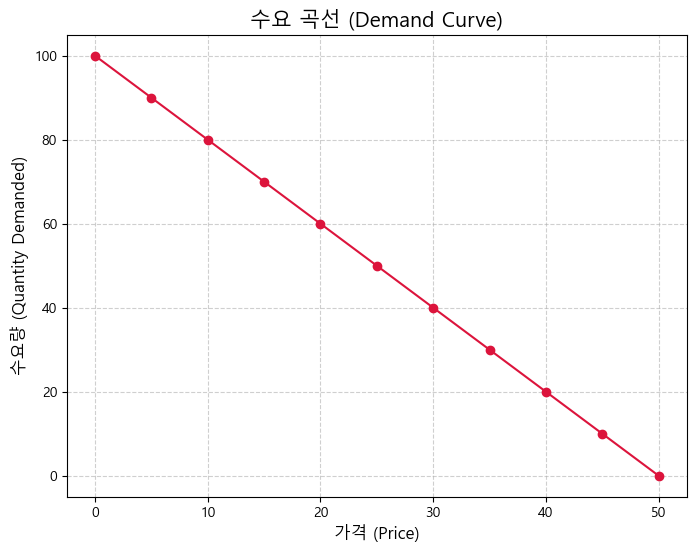

In [17]:
# --- 함수와 시각화 연결 맛보기 ---
import matplotlib.pyplot as plt
import platform # 이전 셀들에서 import 되었다고 가정

# 한글 폰트 설정 (이전 셀들에서 실행되었다고 가정)
try:
    if platform.system() == 'Linux': plt.rc('font', family='NanumBarunGothic')
    elif platform.system() == 'Windows': plt.rc('font', family='Malgun Gothic')
    elif platform.system() == 'Darwin': plt.rc('font', family='AppleGothic')
except NameError: pass # plt가 import 안된 경우 무시
except FileNotFoundError: print("한글 폰트를 찾을 수 없습니다.")
plt.rcParams['axes.unicode_minus'] = False

# 수요 함수 정의 (앞선 예제와 동일)
def quantity_demanded(price, a=100, b=2):
  q_d = a - b * price
  return max(0, q_d) # 음수일 경우 0 반환 (max 함수 사용)

# --- 데이터 생성 (함수와 반복문 활용) ---
# 다양한 가격대를 리스트로 준비 (예: 0부터 50까지 5단위)
prices = list(range(0, 51, 5)) # 0, 5, 10, ..., 50
quantities = [] # 해당 가격에서의 수요량을 저장할 빈 리스트

# 각 가격에 대해 수요량 계산 함수를 호출하고 결과를 리스트에 추가
for p in prices:
    q = quantity_demanded(p) # 함수 호출!
    quantities.append(q)

print("가격 리스트:", prices)
print("수요량 리스트:", quantities)

# --- 시각화 (생성된 데이터 사용) ---
plt.figure(figsize=(8, 6))
plt.plot(prices, quantities, marker='o', color='crimson') # 가격(x축), 수요량(y축)으로 선 그래프

plt.title('수요 곡선 (Demand Curve)', fontsize=15)
plt.xlabel('가격 (Price)', fontsize=12)
plt.ylabel('수요량 (Quantity Demanded)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

**결과를 보세요!** 우리가 정의한 간단한 `quantity_demanded` 함수와 `for` 반복문을 이용해 여러 가격 지점에서의 수요량 데이터를 생성했고, 이 데이터를 Matplotlib을 이용해 그래프로 그리니 경제학 교과서에서 보던 **우하향하는 수요 곡선**이 나타났습니다!

이것이 바로 **함수와 프로그래밍을 통해 경제 이론을 현실적xx인 데이터와 시각화로 연결**하는 강력한 예시입니다. 함수로 경제 모델을 표현하고, 반복문으로 데이터를 생성하며, 시각화 도구로 그 결과를 분석하는 이 과정이 앞으로 우리가 파이썬으로 경제 분석을 하는 핵심적인 흐름이 될 것입니다.

---

## 8. 마무리 및 다음 시간 예고

이번 주에는 코드를 재사용하고 구조화하는 핵심적인 방법인 **함수(Function)** 에 대해 배웠습니다. 함수를 정의(`def`)하고 호출하는 방법, 입력을 받는 매개변수(parameter)와 결과를 돌려주는 반환값(`return`)의 개념을 익혔고, 이를 다양한 경제/회계 계산 함수 예제로 구현해 보았습니다. 또한, **딕셔너리**를 함수와 함께 활용하고 순회하는 방법, 그리고 잠깐 **튜플**에 대해서도 알아보았습니다. 마지막으로 함수를 이용해 생성한 데이터를 **시각화**하여 이론적인 경제 개념(수요 곡선)을 눈으로 확인하는 과정까지 경험했습니다.

**다음 시간에는:**

이제 우리는 파이썬의 기본적인 데이터 타입, 자료 구조(리스트, 딕셔너리), 제어 흐름(조건문, 반복문), 그리고 코드 구조화(함수)까지 배웠습니다! 다음 주에는 이 모든 지식을 종합하여 좀 더 본격적인 **경제 모델링**에 적용해 볼 것입니다. 특히 경제학의 가장 기본 모델인 **수요와 공급 모형**을 파이썬 코드로 구현하고, 두 곡선이 만나는 **시장 균형점**을 찾는 방법에 대해 (개념적으로, 또는 간단한 대수적/수치적 방법으로) 알아볼 예정입니다. 필요하다면, 수치 계산에 더욱 강력한 **NumPy** 라이브러리를 살짝 소개할 수도 있습니다.

---

## 다섯 번째 주차 과제

오늘 배운 함수, 딕셔너리, (선택) 튜플을 연습하기 위해 다음 과제를 Colab에서 새 노트(`Week5_Assignment.ipynb` 등)에 풀어보세요.

1.  **탄력성 계산 함수:** 두 점 $(P_1, Q_1)$ 과 $(P_2, Q_2)$ 가 주어졌을 때, 수요의 가격 탄력성(중간점 공식)을 계산하는 함수 `calculate_elasticity(p1, q1, p2, q2)` 를 정의하세요.
    * 중간점 공식: $E_d = \frac{(Q_2 - Q_1) / ((Q_1 + Q_2)/2)}{(P_2 - P_1) / ((P_1 + P_2)/2)}$
    * 함수는 계산된 탄력성 값(실수)을 반환해야 합니다.
    * 주의: 분모가 0이 되는 경우(가격 또는 수량이 변하지 않는 경우) 오류가 발생할 수 있습니다. 간단하게 `if p1 == p2 or q1 == q2:` 조건을 넣어 0을 반환하거나 `None`을 반환하도록 처리해보세요.
    * 함수를 호출하여 $P_1=10, Q_1=80$ 과 $P_2=15, Q_2=60$ 일 때의 탄력성을 계산하고 출력하세요.
2.  **생산 함수:** 간단한 콥-더글라스 생산 함수 $Y = A K^\alpha L^\beta$ 를 계산하는 함수 `cobb_douglas(capital, labor, alpha=0.3, beta=0.7, A=1)` 를 정의하세요 (K: 자본, L: 노동, alpha/beta: 생산요소 탄력성, A: 총요소생산성).
    * 자본(K)이 100, 노동(L)이 200일 때, 기본 파라미터 값 ($\alpha=0.3, \beta=0.7, A=1$)을 사용하여 총 생산량(Y)을 계산하고 출력하세요.
3.  **딕셔너리 활용:** 학생 정보를 담은 딕셔너리 리스트 `students = [{"name": "Lee", "major": "Economics", "gpa": 4.1}, {"name": "Park", "major": "Business", "gpa": 3.7}, {"name": "Choi", "major": "Economics", "gpa": 3.9}]` 가 있습니다.
    * `for` 반복문과 `if` 조건문을 사용하여 **전공이 "Economics"인 학생들의 이름만** 출력하세요.
    * (도전) 경제학과 학생들의 **평균 GPA**를 계산하여 출력하세요. (힌트: 경제학과 학생의 gpa만 따로 리스트에 모아서 계산)
4.  **(선택) 튜플 사용:** 2023년과 2024년의 (연도, 성장률) 데이터를 각각 `(2023, 1.4)` 와 `(2024, 2.2)` 튜플로 만들고, 이 두 튜플을 요소로 가지는 리스트 `growth_data` 를 만드세요. 그리고 리스트의 첫 번째 요소(2023년 데이터 튜플)를 출력하세요.

---